<a href="https://colab.research.google.com/github/Lelytameyda29rpl/PCVK_Ganjil_2025/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**D. PRAKTIKUM**

# Langkah 1 - Import Folder yang Ada di Drive

In [ ]:
# Import library 'drive' dari modul 'google.colab'
# Library ini digunakan untuk mengakses Google Drive dari Google Colab
from google.colab import drive

# Mount Google Drive ke dalam environment Colab
# '/content/drive' adalah lokasi di Colab di mana Google Drive akan dihubungkan
# Setelah mount, bisa mengakses file di Google Drive seolah-olah berada di folder lokal
drive.mount('/content/drive')

Mounted at /content/drive


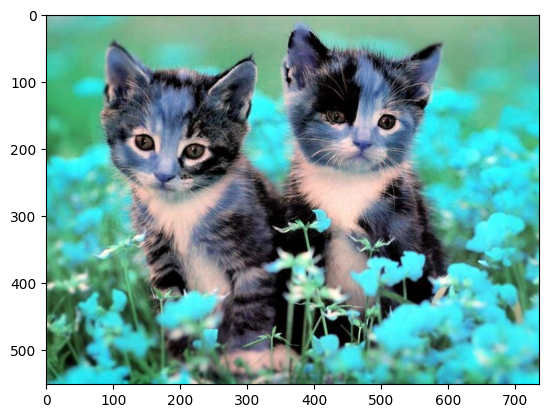

In [ ]:
# Import library OpenCV, digunakan untuk memproses citra
# cv2 adalah library populer untuk pengolahan gambar/video
import cv2 as cv

# Import fungsi cv2_imshow khusus Colab untuk menampilkan gambar dengan OpenCV
# Ini digunakan karena cv.imshow() tidak berjalan di Google Colab
from google.colab.patches import cv2_imshow

# Import modul io dari skimage untuk membaca citra dari URL atau file
# skimage.io bisa digunakan sebagai alternatif cv.imread
from skimage import io

# Import matplotlib untuk menampilkan citra
# plt.imshow digunakan untuk menampilkan citra di notebook
import matplotlib.pyplot as plt

# Import numpy, library untuk manipulasi array (citra juga dianggap sebagai array 2D/3D)
import numpy as np

# Membaca citra dari Google Drive menggunakan OpenCV
# Path sesuai dengan lokasi file di Google Drive setelah mount
# cv.imread membaca citra sebagai array NumPy dengan format BGR (Blue, Green, Red)
img = cv.imread('/content/drive/MyDrive/images/kitten.jpg')

# Menampilkan citra menggunakan matplotlib
# OpenCV membaca citra dalam format BGR, sedangkan matplotlib mengira formatnya RGB
# Akibatnya warna bisa tampak tidak sesuai (misal biru dan merah tertukar)
plt.imshow(img)  # Hasilnya citra dengan channel warna BGR


# Langkah 2 - OpenCV membaca image dan menyimpan dalam channel warna BGR (Blue Green Red) Tampilkan nilai pixel dan image

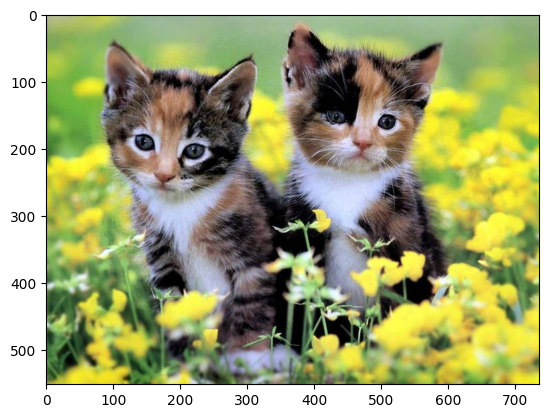

In [ ]:
# Membuat variabel baru 'img2' yang merujuk ke array citra yang sama dengan 'img'
img2 = img

# Mengonversi citra dari format BGR (OpenCV default) menjadi RGB
# OpenCV menggunakan BGR, tapi matplotlib mengharapkan RGB
# Sehingga warna akan tampil dengan benar di matplotlib
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Menampilkan citra yang sudah dikonversi ke RGB menggunakan matplotlib
# Sekarang warna citra akan tampil natural, bukan terbalik antara merah dan biru
plt.imshow(img3)
plt.show()

# Langkah 3 - Menampilkan citra Grayscale, melakukan resizing, melakukan Flipping, Menyimpan citra hasil


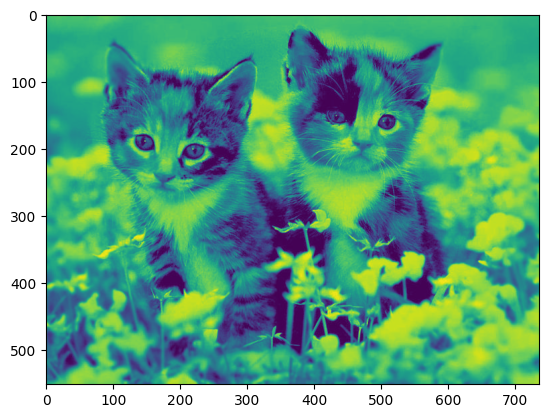

In [ ]:
# Membaca citra dari Google Drive dengan mode grayscale (abu-abu)
# cv.IMREAD_GRAYSCALE memberitahu OpenCV untuk membaca citra sebagai 2D array, bukan 3-channel BGR
img_gray = cv.imread('/content/drive/MyDrive/images/kitten.jpg', cv.IMREAD_GRAYSCALE)

# Menampilkan citra grayscale menggunakan matplotlib
# plt.imshow secara default mengira citra 2D sebagai colormap (warna)
plt.imshow(img_gray)
plt.show()

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna ‘gray’

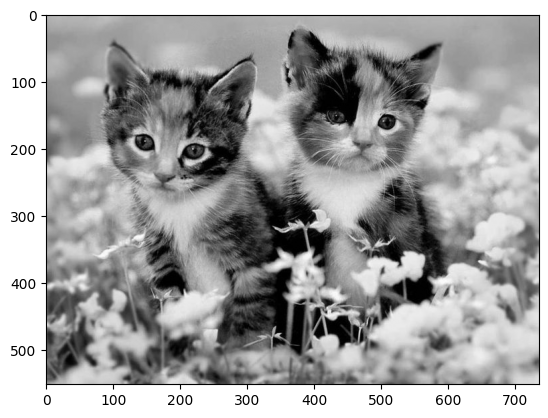

In [ ]:
# Menampilkan citra grayscale menggunakan matplotlib
# Parameter cmap='gray' memberi tahu matplotlib untuk menampilkan citra dalam skala abu-abu
plt.imshow(img_gray, cmap='gray')

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna ‘magma’

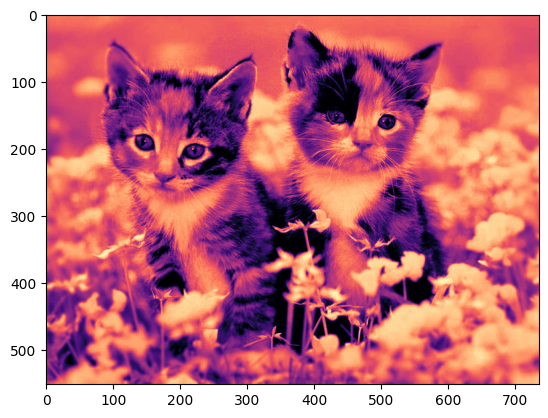

In [ ]:
# Menampilkan citra grayscale menggunakan matplotlib
# cmap='magma' memberi tahu matplotlib untuk menggunakan colormap 'magma' (gradasi warna dari gelap ke terang)
plt.imshow(img_gray, cmap='magma')

Citra RGB di resize dalam ukuran panjang 512 dan lebar 1024

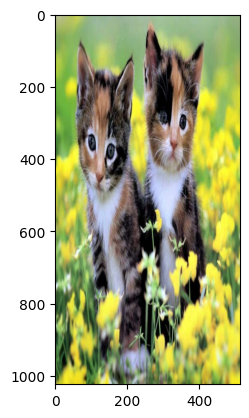

In [ ]:
# Mengonversi citra dari BGR ke RGB agar warna tampil benar di matplotlib
# Lalu melakukan resize citra menjadi ukuran baru (lebar=512, tinggi=1024)
# cv.resize(image, (width, height)) -> ukurannya dalam format (width, height)
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))

# Menampilkan citra hasil konversi dan resize menggunakan matplotlib
plt.imshow(img4)

Citra RGB ditampilkan dalam ukuran yang lebih besar dengan posisi gambar terbalik

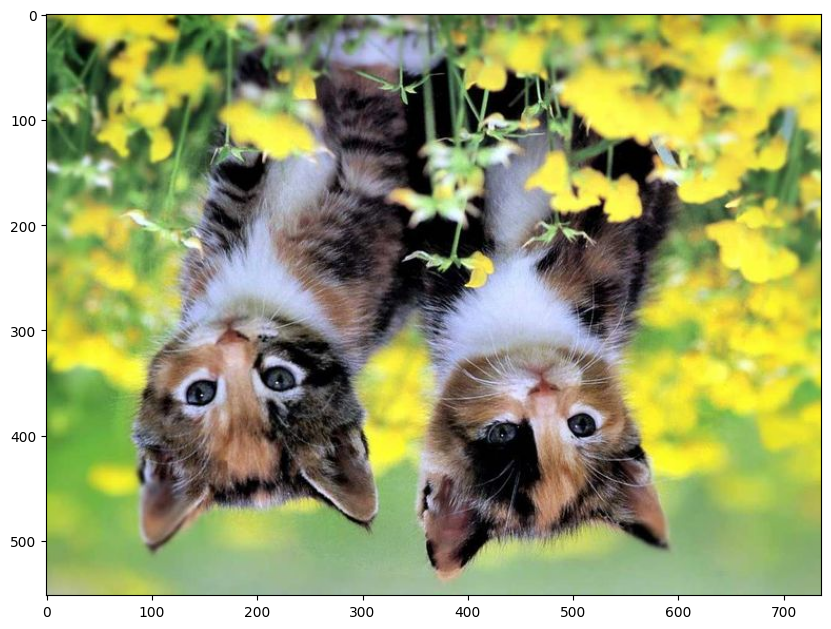

In [ ]:
# Mengonversi citra dari BGR ke RGB agar warna tampil benar di matplotlib
# Lalu membalik citra secara vertikal (flip axis=0)
# cv.flip(image, 0) -> flip secara vertikal; 1 -> horizontal; -1 -> keduanya
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

# Menyimpan citra ke Google Drive (baris ini dikomentari)
# cv.imwrite(path, image) menyimpan array citra ke file image
# Pastikan tanda kutip dan path benar agar tidak error
# cv.imwrite('/content/drive/MyDrive/PCVK_MM/Images/mandrill2.tiff', img5)

# Membuat canvas plot matplotlib yang lebih besar
# figsize=(10,10) artinya ukuran canvas 10x10 inch, bisa diubah sesuai kebutuhan
fig = plt.figure(figsize=(10,10))

# Menambahkan subplot tunggal (1x1) pada figure
ax = fig.add_subplot(111)

# Menampilkan citra img5 di subplot
ax.imshow(img5)

# Langkah 4 - Membuat bentuk Geometri 2D dari OpenCV. Diawali dengan pembuatan black image dengan tipe data int16.

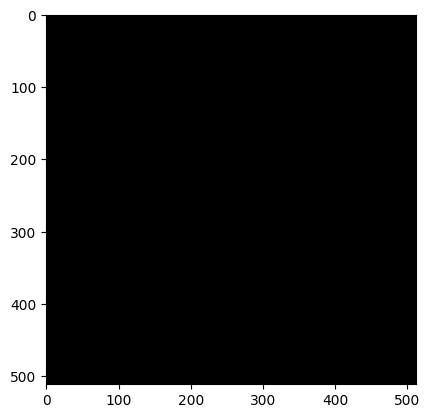

In [21]:
# Membuat array NumPy berukuran 512x512 dengan 3 channel (RGB), semua nilainya 0
# np.zeros(...) -> membuat citra hitam karena semua piksel bernilai 0
# dtype=np.int16 artinya setiap nilai piksel adalah integer 16-bit
black_img = np.zeros(shape=(512, 512, 3), dtype=np.int16)

# Menampilkan citra hitam menggunakan matplotlib
plt.imshow(black_img)

Kemudian menambahkan bentuk persegi panjang sesuai koordinat pt1 dan pt2

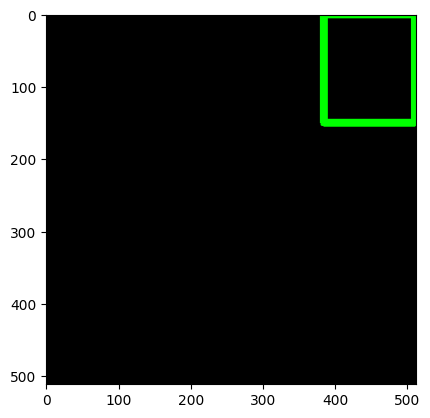

In [22]:
# Menggambar persegi panjang (rectangle) pada citra black_img menggunakan OpenCV
# pt1 = (384, 0) -> koordinat titik pojok kiri atas persegi panjang
# pt2 = (510, 150) -> koordinat titik pojok kanan bawah persegi panjang
# color = (0, 255, 0) -> warna persegi panjang dalam format RGB (hijau)
# thickness = 10 -> ketebalan garis persegi panjang, jika -1 maka akan terisi penuh
cv.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 0), thickness=10)

# Menampilkan citra setelah digambar persegi panjang
plt.imshow(black_img)

Selanjutnya ditambah menambahkan bentuk persegi sesuai koordinat pt1 dan pt2
yang tertulis pada kode program.

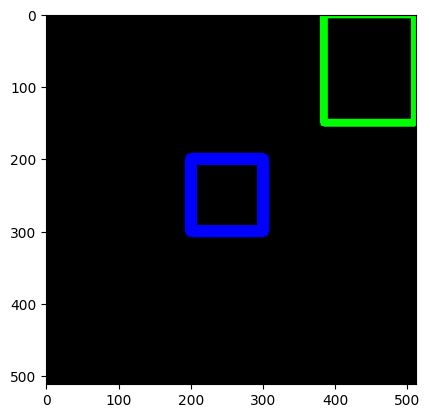

In [23]:
# Menggambar persegi panjang kedua pada citra black_img menggunakan OpenCV
# pt1 = (200, 200) -> koordinat titik pojok kiri atas persegi panjang
# pt2 = (300, 300) -> koordinat titik pojok kanan bawah persegi panjang
# color = (0, 0, 255) -> warna persegi panjang merah (format RGB)
# thickness = 15 -> ketebalan garis persegi panjang
cv.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(0, 0, 255), thickness=15)

# Menampilkan citra setelah digambar persegi panjang kedua
plt.imshow(black_img)

Tahap selanjutnya ditambah menambahkan bentuk lingkaran sesuai radius yang
tertulis pada kode program.

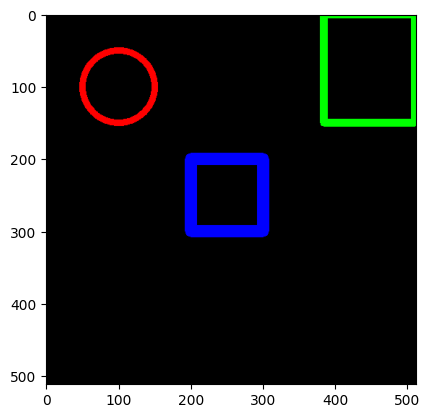

In [24]:
# Menggambar lingkaran pada citra black_img menggunakan OpenCV
# center = (100, 100) -> koordinat titik pusat lingkaran
# radius = 50 -> jari-jari lingkaran dalam piksel
# color = (255, 0, 0) -> warna lingkaran biru (format RGB)
# thickness = 8 -> ketebalan garis lingkaran; jika -1 maka lingkaran terisi penuh
cv.circle(black_img, center=(100, 100), radius=50, color=(255, 0, 0), thickness=8)

# Menampilkan citra setelah lingkaran digambar
plt.imshow(black_img)

Kemudian dilakukan penambahan garis sesuai koordinat pt1 dan pt2 sebagai berikut.

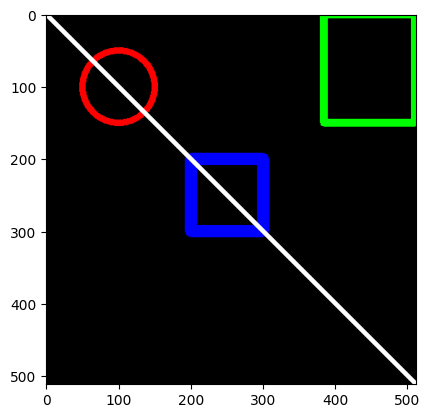

In [25]:
# Menggambar garis pada citra black_img menggunakan OpenCV
# pt1 = (0,0) -> titik awal garis (pojok kiri atas citra)
# pt2 = (512,512) -> titik akhir garis (pojok kanan bawah citra)
# color = (255,255,255) -> warna garis putih (format RGB)
# thickness = 5 -> ketebalan garis
cv.line(black_img, pt1=(0,0), pt2=(512,512), color=(255,255,255), thickness=5)

# Menampilkan citra setelah garis digambar
plt.imshow(black_img)

Penambahan text dengan font yang telah tertulis dengan ukuran yang sudah
ditentukan.

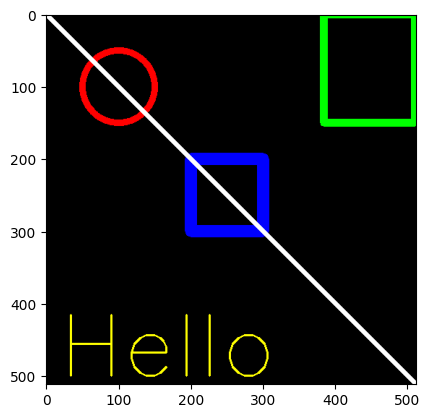

In [26]:
# Menentukan jenis font bawaan OpenCV
# cv.FONT_HERSHEY_SIMPLEX adalah font sederhana bergaya sans-serif
font = cv.FONT_HERSHEY_SIMPLEX

# Menuliskan teks "Hello" pada citra black_img
# text = 'Hello' -> teks yang akan ditampilkan
# org = (18,500) -> posisi kiri bawah teks pada citra (x=18, y=500)
# fontFace = font -> jenis font yang digunakan (diambil dari variabel 'font')
# fontScale = 4 -> ukuran skala teks (semakin besar, semakin besar hurufnya)
# color = (255,255,0) -> warna teks kuning (R=255, G=255, B=0)
# thickness = 2 -> ketebalan garis huruf
# lineType = cv.LINE_AA -> tipe garis antialiasing, membuat tepi huruf lebih halus
cv.putText(
    black_img,
    text='Hello',
    org=(18, 500),
    fontFace=font,
    fontScale=4,
    color=(255,255,0),
    thickness=2,
    lineType=cv.LINE_AA
)

# Menampilkan citra setelah teks ditambahkan
plt.imshow(black_img)

Pembuatan black image kembali dilakukan dengan tipe data int32

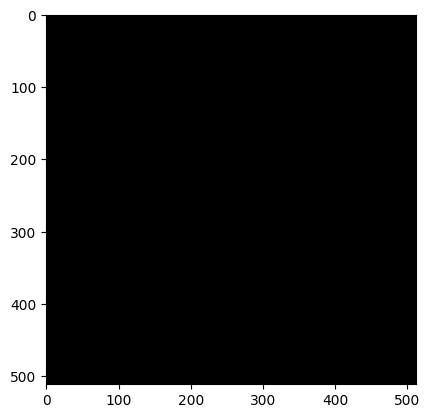

In [27]:
# Membuat array NumPy dengan ukuran 512x512 piksel dan 3 channel (RGB)
# Semua nilai awalnya nol → menghasilkan citra hitam
# dtype=np.int32 artinya setiap piksel disimpan dalam integer 32-bit
black_img2 = np.zeros(shape=(512, 512, 3), dtype=np.int32)

# Menampilkan citra hitam tersebut menggunakan matplotlib
plt.imshow(black_img2)

Berikut adalah kode program untuk inisialisasi NumPy array dengan tipe data int32

In [28]:
# Membuat array NumPy berisi koordinat titik-titik (vertices) poligon
# Koordinat ditulis dalam format (x, y)
# dtype=np.int32 -> tipe data integer 32-bit (disyaratkan oleh fungsi OpenCV seperti cv.polylines)
vertices = np.array([
    [100, 300],   # titik pertama
    [200, 200],   # titik kedua
    [400, 300],   # titik ketiga
    [200, 400]    # titik keempat
], dtype=np.int32)

# Menampilkan array vertices
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

Array tersebut kemudian di reshape sebagai berikut


In [29]:
# Mengubah bentuk (reshape) array vertices agar sesuai dengan format yang dibutuhkan OpenCV
# (-1, 1, 2) artinya:
#   -1 -> biarkan NumPy hitung jumlah titik otomatis
#    1 -> setiap titik dibungkus dalam array terpisah
#    2 -> setiap titik punya 2 koordinat (x, y)
pts = vertices.reshape((-1, 1, 2))

# Menampilkan hasil reshape
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

Penambahan polyline pada black image kedua yang telah dibuat.

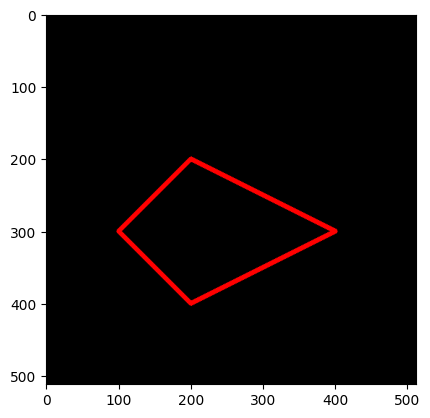

In [30]:
# Menggambar poligon pada citra black_img2
# black_img2 -> kanvas hitam yang sudah dibuat sebelumnya
# [pts] -> kumpulan titik-titik poligon dalam format yang sesuai (hasil reshape)
# isClosed=True -> poligon ditutup otomatis (titik terakhir terhubung ke titik pertama)
# color=(255,0,0) -> warna garis biru (format RGB)
# thickness=5 -> ketebalan garis poligon
cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)

# Menampilkan citra setelah poligon digambar
plt.imshow(black_img2)

 # **PERTANYAAN**

1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?

   **Jawab:**

   - **Tanpa matplotlib** (misalnya dengan cv2.imshow atau cv2_imshow):

     - Menampilkan gambar sesuai format asli BGR (karena OpenCV default membaca citra dalam BGR).

     - Warna tampil benar tanpa perlu konversi.

     - Tapi di Google Colab, cv2.imshow() tidak bisa dipakai, sehingga butuh cv2_imshow().

   - **Dengan matplotlib** (plt.imshow):

      - Matplotlib menganggap array citra dalam format RGB.

      - Jika gambar masih BGR (dari OpenCV), maka warna akan tertukar (biru ↔ merah).

      - Supaya warna tampil benar, perlu konversi:

        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        plt.imshow(img_rgb)

2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16 dan int32?

   **Jawab:**

   - **int16 (16-bit signed integer):**

     - Rentang nilai: -32768 sampai 32767.

     - Tidak cocok untuk citra standar (karena citra umumnya 0–255).

     - Jika ada nilai negatif → bisa menyebabkan hasil aneh/warna tidak tampil sesuai.

   - **Sedangkan int32 (32-bit signed integer):**

     - Rentang nilai: -2,147,483,648 sampai 2,147,483,647.

     - Sama-sama tidak umum untuk citra standar.

     - File akan lebih besar, operasi jadi lebih berat, tapi lebih aman dari overflow.

    - **Kesimpulan:** Untuk citra standar, lebih baik gunakan np.uint8 (0–255), bukan int16 atau int32. Keduanya (int16 dan int32) hanya berbeda di rentang nilai, tapi sama-sama tidak ideal untuk pemrosesan gambar biasa.

3. Apakah kegunaan “google.colab.patches import cv2_imshow” pada potongan kode berikut:

   from google.colab.patches import cv2_imshow

   from skimage import io

   - **Jawab:**

     - **Kegunaan from google.colab.patches import cv2_imshow**

       - Masalahnya: cv2.imshow() (fungsi bawaan OpenCV) hanya bisa jalan di aplikasi desktop dengan GUI, tidak bisa digunakan di Google Colab (karena Colab berbasis web).

       - Solusinya: Google Colab menyediakan cv2_imshow melalui modul google.colab.patches.

       - Fungsinya: menampilkan gambar hasil olah OpenCV langsung di notebook Colab.

      - **Jadi intinya:**
        - from google.colab.patches import cv2_imshow adalah mengimpor fungsi khusus Colab untuk menampilkan gambar OpenCV di notebook, menggantikan cv2.imshow yang tidak bisa dipakai di Colab.

4. Apakah kegunaan “skimage import io” pada potongan kode soal nomor 3

    - **Jawab:**

       - skimage.io digunakan untuk membaca dan menulis citra.

       - Berbeda dengan cv.imread, io.imread bisa langsung membaca gambar dari:

         - File lokal (di Drive atau komputer)

         - URL (internet) tanpa perlu download manual

       - Hasilnya otomatis berupa NumPy array, siap diproses lebih lanjut.

# **E. TUGAS**

Berdasarkan praktikum bagian 1 dan 2 kerjakan beberapa tugas berikut :

1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga
berubah?

   - **Jawab:**

      - **Sebenarnya yang dilakukan kode figsize pada praktikum yang telah  dilakukan sebelumnya adalah**

        - fig = plt.figure(figsize=(10,10)) → hanya memperbesar ukuran kanvas tampilan (dalam inch) saat gambar dipresentasikan di matplotlib.

        - ax.imshow(img5) → menampilkan gambar pada subplot tersebut.

      - **Jadi kesimpulannya:**

        Tidak. Ukuran pixel gambar (img5.shape) tetap sama. figsize hanya mempengaruhi ukuran tampilan di canvas matplotlib, bukan mengubah jumlah piksel citra.

2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!

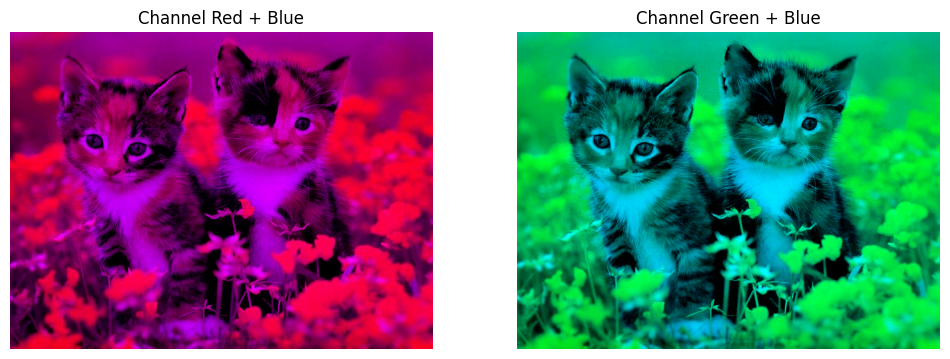

In [31]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Baca citra (BGR) lalu ubah ke RGB
img = cv.imread('/content/drive/MyDrive/images/kitten.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Pisahkan channel
R, G, B = cv.split(img_rgb)

# --- Kombinasi Red-Blue (R+B) ---
# Gabungkan channel R dan B, isi G dengan nol
RB = cv.merge([R, np.zeros_like(G), B])

# --- Kombinasi Green-Blue (G+B) ---
# Gabungkan channel G dan B, isi R dengan nol
GB = cv.merge([np.zeros_like(R), G, B])

# Tampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].imshow(RB)
axs[0].set_title("Channel Red + Blue")
axs[0].axis("off")

axs[1].imshow(GB)
axs[1].set_title("Channel Green + Blue")
axs[1].axis("off")

plt.show()

**Penjelasan**

  - cv.split(img_rgb) → memecah gambar jadi 3 channel terpisah: R, G, B.

  - np.zeros_like(...) → membuat array hitam (0) dengan ukuran sama untuk channel yang dihilangkan.

  - cv.merge([...]) → menggabungkan kembali channel sesuai kombinasi yang diinginkan.

  - Hasil:

    - RB → hanya merah + biru, hijau dihilangkan.

    - GB → hanya hijau + biru, merah dihilangkan.

3. Tampilkan image baris ke 20-115, kolom 25-120!

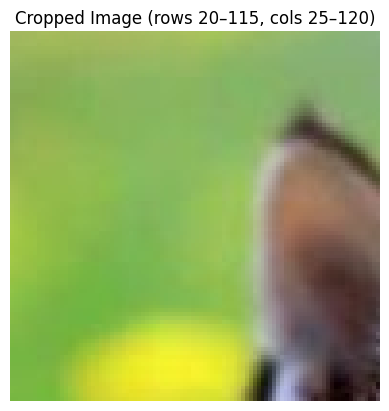

In [32]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar
img = cv.imread('/content/drive/MyDrive/images/kitten.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Crop citra: baris 20–115, kolom 25–120
# Format slicing: img[baris_awal:baris_akhir, kolom_awal:kolom_akhir]
cropped_img = img_rgb[20:116, 25:121]

# Tampilkan hasil
plt.imshow(cropped_img)
plt.title("Cropped Image (rows 20–115, cols 25–120)")
plt.axis("off")
plt.show()

**Penjelasan**

  - img_rgb[20:116, 25:121] → slicing NumPy array.

     - 20:116 → baris ke-20 sampai ke-115 (ingat, Python slicing tidak termasuk indeks terakhir).

     - 25:121 → kolom ke-25 sampai ke-120.

  - Hasilnya adalah bagian kecil dari gambar sesuai koordinat tersebut.

4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

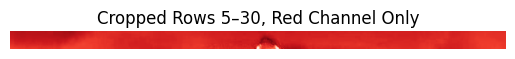

In [33]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca citra dan konversi ke RGB
img = cv.imread('/content/drive/MyDrive/images/kitten.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ambil baris ke 5-30, semua kolom, hanya channel Red
# Index channel: 0=R, 1=G, 2=B
red_channel = img_rgb[5:31, :, 0]

# Tampilkan hasil
plt.imshow(red_channel, cmap='Reds')  # gunakan colormap 'Reds' agar jelas
plt.title("Cropped Rows 5–30, Red Channel Only")
plt.axis("off")
plt.show()

**Penjelasan**

  - img_rgb[5:31, :, 0] → slicing NumPy array:

    - 5:31 → ambil baris ke-5 sampai ke-30 (ingat, Python stop index tidak termasuk).

    - : → semua kolom.

    - 0 → hanya channel Red.

  - cmap='Reds' → membuat tampilan lebih intuitif (nuansa merah).

5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image.
disarankan menggunakan bilangan acak/random!

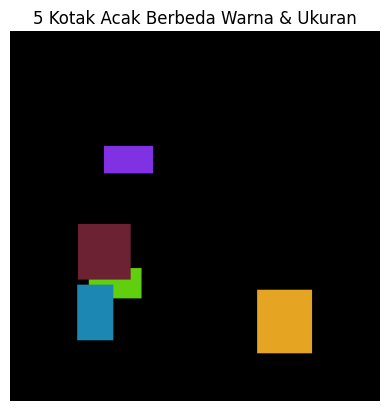

In [34]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Buat kanvas hitam (512x512, 3 channel warna)
canvas = np.zeros((512, 512, 3), dtype=np.uint8)

# Buat 5 kotak dengan posisi, ukuran, dan warna acak
for i in range(5):
    # titik kiri atas (pt1) dan kanan bawah (pt2)
    x1, y1 = np.random.randint(0, 400, size=2)   # random koordinat
    x2, y2 = x1 + np.random.randint(30, 100), y1 + np.random.randint(30, 100)  # ukuran acak

    # warna acak (R,G,B)
    color = tuple(np.random.randint(0, 256, size=3).tolist())

    # gambar kotak ke kanvas
    cv.rectangle(canvas, (x1, y1), (x2, y2), color, thickness=-1)  # -1 = isi penuh

# Tampilkan hasil
plt.imshow(canvas)
plt.title("5 Kotak Acak Berbeda Warna & Ukuran")
plt.axis("off")
plt.show()

**Penjelasan**

  - np.zeros((512,512,3), dtype=np.uint8) → buat kanvas hitam 512×512 piksel, 3 channel (RGB).

  - np.random.randint → dipakai untuk menghasilkan koordinat acak, ukuran kotak acak, dan warna acak.

  - cv.rectangle(..., thickness=-1) → menggambar kotak terisi penuh.

  - Loop for i in range(5) → bikin 5 kotak.

6. Tampilkan image dengan posisi terbalik!

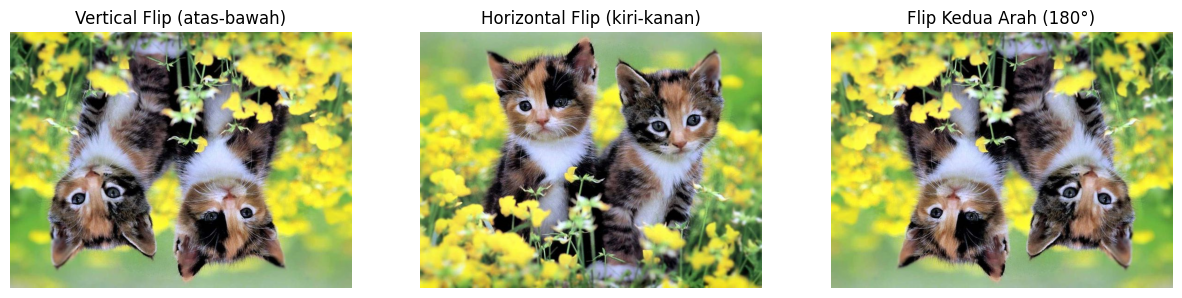

In [35]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar dan konversi ke RGB
img = cv.imread('/content/drive/MyDrive/images/kitten.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Flip gambar
flip_vertical = cv.flip(img_rgb, 0)
flip_horizontal = cv.flip(img_rgb, 1)
flip_both = cv.flip(img_rgb, -1)

# Tampilkan hasil
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].imshow(flip_vertical)
axs[0].set_title("Vertical Flip (atas-bawah)")
axs[0].axis("off")

axs[1].imshow(flip_horizontal)
axs[1].set_title("Horizontal Flip (kiri-kanan)")
axs[1].axis("off")

axs[2].imshow(flip_both)
axs[2].set_title("Flip Kedua Arah (180°)")
axs[2].axis("off")

plt.show()

**Penjelasan**

  - Fungsi cv.flip membuat salinan citra dengan orientasi terbalik.

    - cv.flip(img, 0) → vertical flip (atas ↔ bawah)

    - cv.flip(img, 1) → horizontal flip (kiri ↔ kanan)

    - cv.flip(img, -1) → kedua arah (horizontal + vertical, jadi rotasi 180°)

  - Ukuran piksel citra tidak berubah, hanya orientasinya yang diputar.

Berdasarkan praktikum bagian 3 dan 4 kerjakan beberapa tugas berikut:

7. Buat rectangle dan circle pada bagian wajah dari image foto anda saat
beraktifitas (bukan pasfoto).

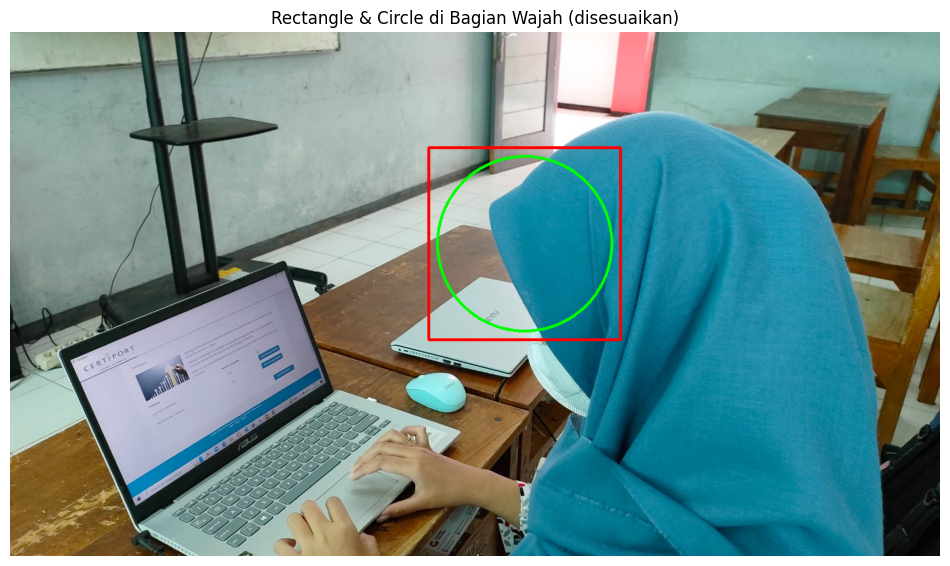

In [38]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar dari path upload
img = cv.imread('/content/drive/MyDrive/images/foto.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Copy image supaya gambar asli tidak berubah
output = img_rgb.copy()

# --- Rectangle di sekitar wajah (lebih ke bawah) ---
cv.rectangle(output, (720,200), (1050,530), color=(255,0,0), thickness=4)

# --- Circle di tengah wajah (geser lebih ke bawah juga) ---
cv.circle(output, (885,365), 150, color=(0,255,0), thickness=4)

# Tampilkan hasil
plt.figure(figsize=(12,8))
plt.imshow(output)
plt.title("Rectangle & Circle di Bagian Wajah (disesuaikan)")
plt.axis("off")
plt.show()

**Penjelasan**

**1. Membaca & konversi gambar**

  - cv.imread(...) membaca file dari path Google Drive.

  - Karena OpenCV default-nya membaca gambar dalam format BGR, maka dilakukan konversi dengan cv.cvtColor(..., cv.COLOR_BGR2RGB) supaya warna tampil benar saat divisualisasikan dengan matplotlib.

**2. Membuat salinan gambar**

  - output = img_rgb.copy() digunakan agar gambar asli tidak diubah, sehingga setiap anotasi hanya ada pada output.

**3. Menambahkan Rectangle**

  - cv.rectangle(output, (720,200), (1050,530), color=(255,0,0), thickness=4)

  - Rectangle digambar mulai dari titik kiri-atas (720,200) hingga kanan-bawah (1050,530).

  - Hasilnya adalah kotak merah yang mengurung area wajah (di dalam hijab).

**4. Menambahkan Circle**

  - cv.circle(output, (885,365), 150, color=(0,255,0), thickness=4)

  - Lingkaran dengan pusat di (885,365) dan radius 150.

  - Hasilnya adalah lingkaran hijau yang kira-kira menutupi wajah.

  - Posisinya sudah lebih pas dibanding yang pertama (tidak terlalu ke atas).

**5. Menampilkan hasil dengan matplotlib**

  - plt.figure(figsize=(12,8)) hanya mengatur ukuran canvas tampilan, tidak mengubah resolusi pixel asli gambar.

  - plt.imshow(output) menampilkan hasil dengan rectangle merah + circle hijau.

  - plt.axis("off") menyembunyikan sumbu X dan Y agar lebih rapi.

8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB
dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/ peppers!  

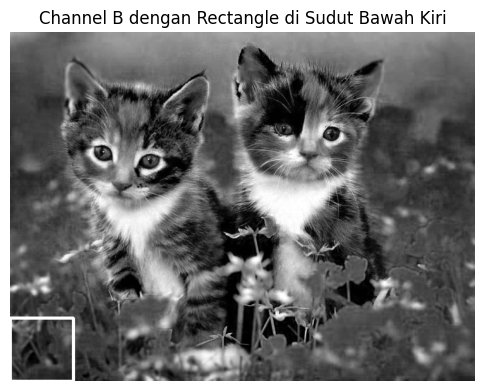

In [39]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar contoh (misal kitten.jpg di drive kamu)
img = cv.imread('/content/drive/MyDrive/images/kitten.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ambil channel B (Blue)
B = img_rgb[:,:,2].copy()  # indeks 2 = channel Blue di RGB

# Dapatkan tinggi dan lebar citra
h, w = B.shape

# Gambar rectangle di sudut bawah kiri
# (0, h-100) -> kiri bawah, (100, h) -> batas atas kanan kotak
cv.rectangle(B, (0, h-100), (100, h), color=(255, 255, 255), thickness=3)

# Tampilkan hasil
plt.figure(figsize=(6,6))
plt.imshow(B, cmap='gray')  # channel B ditampilkan grayscale
plt.title("Channel B dengan Rectangle di Sudut Bawah Kiri")
plt.axis("off")
plt.show()

**Penjelasan**

- Gambar yang muncul adalah channel biru (Blue) dari citra kitten → tampil grayscale.

  - Bagian cerah → daerah dengan intensitas biru tinggi.

  - Bagian gelap → daerah dengan intensitas biru rendah.

- Pada sudut kiri bawah gambar, ada rectangle putih (garis tebal).

  - Rectangle ini menandai area yang dipilih.

  - Karena bekerja hanya pada channel biru, rectangle warnanya otomatis putih/abu-abu.

- Jadi, hasil akhirnya adalah channel biru citra kitten dalam grayscale, dengan sebuah rectangle putih di sudut kiri bawah.

9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font, ukuran font, dan warna font yang sesuai keinginan anda.

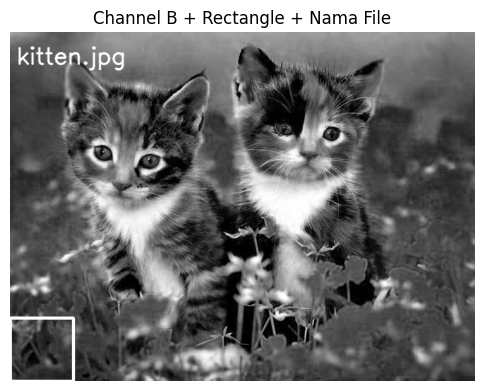

In [40]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar contoh (misal kitten.jpg di drive kamu)
img = cv.imread('/content/drive/MyDrive/images/kitten.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ambil channel B (Blue)
B = img_rgb[:,:,2].copy()  # channel Blue

# Dapatkan tinggi dan lebar citra
h, w = B.shape

# Gambar rectangle di sudut bawah kiri
cv.rectangle(B, (0, h-100), (100, h), color=(255, 255, 255), thickness=3)

# Tambahkan tulisan nama file
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(
    B,
    text='kitten.jpg',        # isi teks
    org=(10, 50),             # posisi teks (x=10, y=50 dari atas kiri)
    fontFace=font,            # jenis font
    fontScale=1.2,            # ukuran font
    color=(255, 255, 255),    # warna font (putih untuk grayscale)
    thickness=2,              # ketebalan garis font
    lineType=cv.LINE_AA       # jenis garis agar halus
)

# Tampilkan hasil
plt.figure(figsize=(6,6))
plt.imshow(B, cmap='gray')
plt.title("Channel B + Rectangle + Nama File")
plt.axis("off")
plt.show()

**Penjelasan**

**1. Baca dan konversi citra**

  - cv.imread() membaca file kitten.jpg.

  - cv.cvtColor(..., cv.COLOR_BGR2RGB) memastikan format warna sesuai (RGB).

**2. Ambil channel biru (B)**

  - img_rgb[:,:,2] → mengambil hanya channel Blue dari citra.

  - Hasilnya berupa citra grayscale yang berisi intensitas warna biru.

**3. Gambar rectangle di sudut bawah kiri**

  - cv.rectangle(B, (0,h-100), (100,h), ...) menggambar kotak putih dengan ukuran 100×100 px.

  - Kotak ini berada di pojok kiri bawah citra.

**4. Menambahkan tulisan nama file**

  - cv.putText(B, "kitten.jpg", (10,50), ...) menambahkan teks “kitten.jpg” pada posisi (10,50) dari kiri atas.

  - Font yang dipakai = FONT_HERSHEY_SIMPLEX.

  - Skala font = 1.2, ketebalan = 2, warna = putih.

  - cv.LINE_AA digunakan supaya garis teks lebih halus (anti-aliased).

**5. Tampilkan dengan matplotlib**

  - plt.imshow(B, cmap='gray') menampilkan citra channel biru dengan colormap grayscale.

 - Judul gambar ditambahkan dengan plt.title(...).


**Hasil**

- Tampilan citra adalah grayscale karena hanya channel biru yang dipakai.

- Di sudut kiri bawah, ada sebuah rectangle putih.

- Di bagian kiri atas citra, muncul tulisan “kitten.jpg” dengan font putih.

10. Tunjukkan code program anda pada bapak/ibu dosen